# **Image segmentation**

## 1. Git Clone and set tensorflow backend version to 1.x

In [1]:
# tensorflow backend important 
%tensorflow_version 1.x

# up grade h5py
! pip install --upgrade h5py==2.10.0

# clone Mask-RCNN from Github: 
! git clone https://github.com/Koussailakadi/Mask_RCNN.git 

%matplotlib inline

TensorFlow 1.x selected.


'# up grade h5py\n! pip install --upgrade h5py==2.10.0\n\n# clone Mask-RCNN from Github: \n! git clone https://github.com/Koussailakadi/Mask_RCNN.git \n\n%matplotlib inline'

In [2]:
import os
import sys
sys.path.append("/content/Mask_RCNN/")
print(os.getcwd())
print(os.listdir(os.getcwd()))
from mrcnn import*
from mrcnn.m_rcnn import*

/content
['.config', 'logs', 'Mask_RCNN', 'annotations_coco.json', 'with_cracks.zip', 'dataset', 'mask_rcnn_coco.h5', 'sample_data']
VERS 0.2


Using TensorFlow backend.


## **2. Image Dataset**

Load your annotated dataset


In [3]:
# Extract Images
images_path = "with_cracks.zip"
annotations_path = "annotations_coco.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 687 images


In [4]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
dataset_test = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "test")
class_number = dataset_train.count_classes()
print('All images :',len(dataset_train.image_ids)+len(dataset_val.image_ids)+len(dataset_test.image_ids))
print('Train:',len(dataset_train.image_ids))
print('Validation:',len(dataset_val.image_ids))
print('test: ',len(dataset_test.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/annotations_coco.json
Annotation json path:  /content/annotations_coco.json
Annotation json path:  /content/annotations_coco.json
All images : 687
Train: 602
Validation: 43
test:  42
Classes: 2


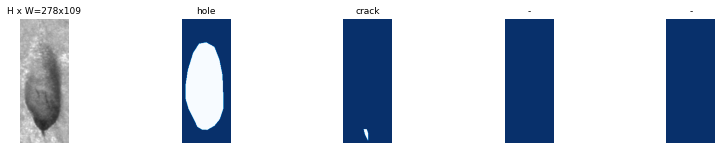

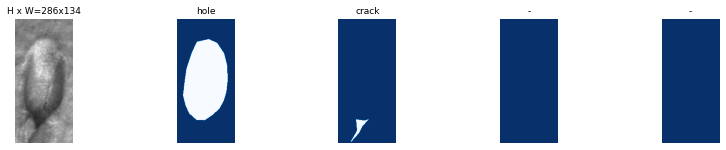

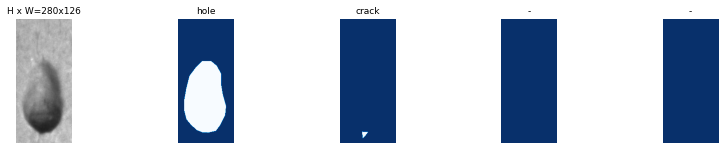

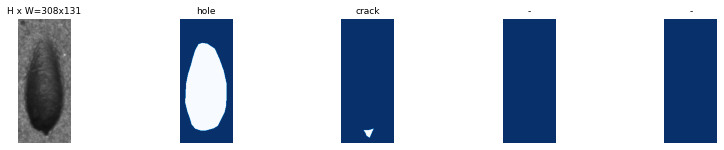

In [5]:
# Load image samples
display_image_samples(dataset_train)

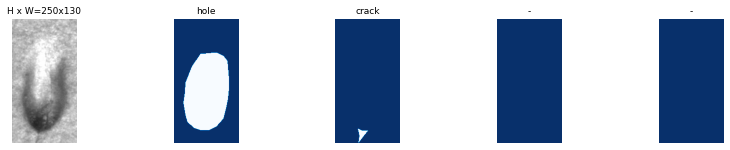

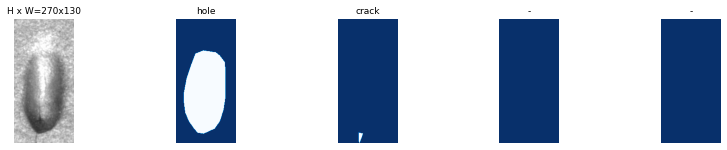

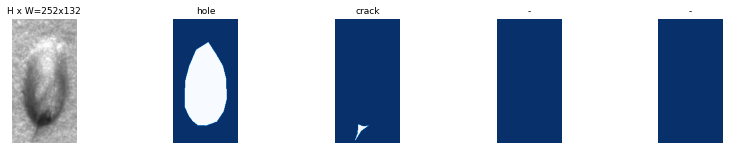

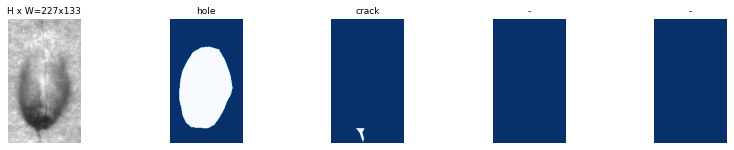

In [6]:
# Load image samples
display_image_samples(dataset_val)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [22]:
class CustomConfig(Config):
    """Configuration for training on the custom  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    IMAGES_PER_GPU = 2

    NUM_CLASSES = 1 + 2  # Background + Car and truck

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 300 
    VALIDATION_STEPS = 20

    # Images size:  
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 384

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    # learning rate
    LEARNING_RATE = 0.001

    

# Load Configuration
config = CustomConfig()
config.display()
model = load_training_model(config)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [23]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_val, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/logs/object20220121T2250/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         

## **4. Detection (test your model on a random image)**

In [24]:
# Load Test Model
# The latest trained model will be loaded
#test_model, inference_config = load_test_model()
#LOAD MODEL. Create model in inference mode
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)


# Get path to saved weights
model_path = model.find_last()
print(model_path)

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

/content/logs/object20220121T2250/mask_rcnn_object_0005.h5
Loading weights from  /content/logs/object20220121T2250/mask_rcnn_object_0005.h5
Re-starting from epoch 5


In [11]:
# Test on a random image
# test_random_image(model, dataset_val, config)

original_image           shape: (384, 384, 3)         min:    0.00000  max:  163.00000  uint8


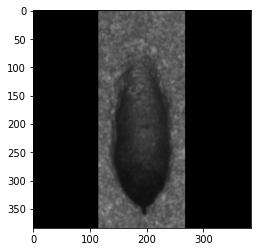

Trained model result
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  163.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:   59.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.94527  max:    1.77817  float32


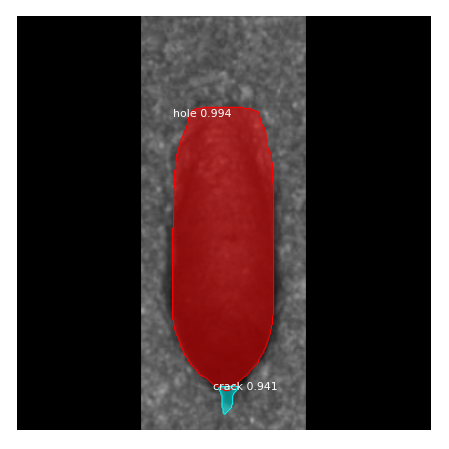

In [33]:
image_id = random.choice(dataset_test.image_ids)
#image_id=224
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
    modellib.load_image_gt(dataset_test, config,
                            image_id, use_mini_mask=False)

log("original_image", original_image)
plt.imshow(original_image)
plt.show()
# log("image_meta", image_meta)
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

# Model result
print("Trained model result")
results = model.detect([original_image], verbose=1)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                            dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False)